### Aplicación kmeans

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Cargar el archivo CSV subido
df = pd.read_csv("housing.csv")

# Solo quedate con longitud, latitud y precio 
df = df[['median_house_value', 'latitude', 'longitude']]


### Crae al pipeline y haz fit 
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3))
])
pipeline.fit(df)

Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=3))])

pipeline.named_steps['kmeans'].labels_


In [2]:
# Obten los clusters
df['cluster'] = pipeline.predict(df)

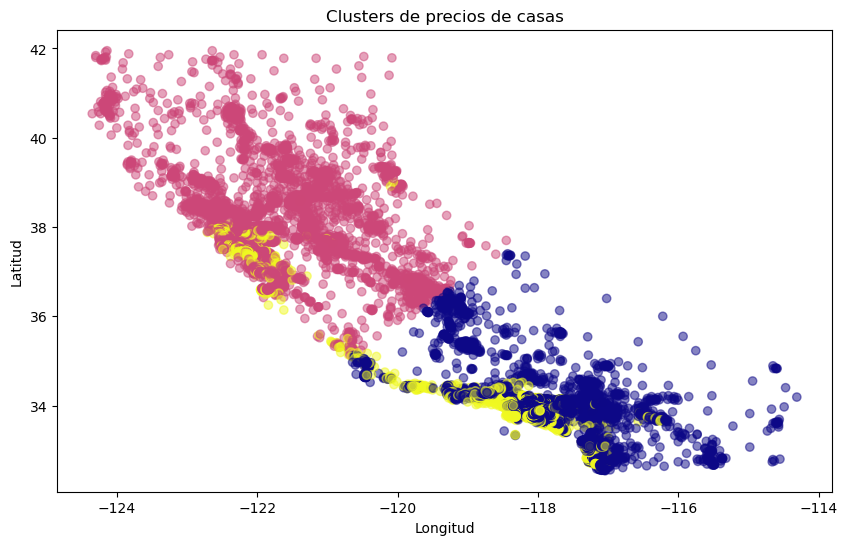

In [3]:
# Graficar
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster'], cmap='plasma', alpha=0.5)
plt.title('Clusters de precios de casas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
#plt.colorbar(label='Cluster')
plt.show()

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Datos: ya filtrados en df
X = df[['median_house_value', 'latitude', 'longitude']]


# Guarda la varianza del cluster o "inertia"
inertias = []

# ¿Cuantos clusters probar?
K_range = range(1, 11)


# Gráfica del codo
